## Classification


In [61]:
import numpy as np
from sklearn.neural_network import MLPClassifier
X = [[0., 0.], [1., 1.]]
y = [0, 1]
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)

clf.fit(X, y)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [62]:
clf.predict([[2,3], [-1,2]])

array([1, 0])

In [63]:
[coef.shape for coef in clf.coefs_]

[(2, 5), (5, 2), (2, 1)]

In [64]:
values_to_predict = [[2,3], [-1,2]]
clf.predict_proba(values_to_predict)
pred = clf.predict_proba(values_to_predict)
for i,j in zip(values_to_predict, pred):
    print(f"Value: {i} - Predicted class: {np.argmax(j)}")

Value: [2, 3] - Predicted class: 1
Value: [-1, 2] - Predicted class: 0


In [65]:
X = [[0.,0.], [1., 1.]]
y = [[0,1], [1,1]]
clf = MLPClassifier(hidden_layer_sizes=(15,), solver='lbfgs', alpha=1e-5, random_state=1)
clf.fit(X,y)

values_to_predict = [[1.,2.], [0.,0.]]
for i in values_to_predict:
    pred = clf.predict([i])
    print(f"Value: {i} - Predicted class: {pred}")

Value: [1.0, 2.0] - Predicted class: [[1 1]]
Value: [0.0, 0.0] - Predicted class: [[0 1]]


In [66]:
[clf.shape for clf in clf.coefs_]

[(2, 15), (15, 2)]

## Compare Stochastic learning strategies for MLPClassifier

In [67]:
import warnings

import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets
from sklearn.exceptions import ConvergenceWarning

# different learning rate schedules and momentum parameters
params = [
    {
        "solver": "sgd",
        "learning_rate": "constant",
        "momentum":0,
        "learning_rate_init":0.2
    },
    {
        "solver": "sgd",
        "learning_rate": "constant",
        "momentum":0.9,
        "nesterovs_momentum":False,
        "learning_rate_init":0.2
    },
    {
        "solver": "sgd",
        "learning_rate": "constant",
        "momentum":0.9,
        "nesterovs_momentum":True,
        "learning_rate_init":0.2
    },
    {
        "solver": "sgd",
        "learning_rate": "invscaling",
        "momentum":0,
        "learning_rate_init":0.2
    },
    {
        "solver": "sgd",
        "learning_rate": "invscaling",
        "momentum":0.9,
        "nesterovs_momentum":False,
        "learning_rate_init":0.2
    },
    {
        "solver": "sgd",
        "learning_rate": "invscaling",
        "momentum":0.9,
        "nesterovs_momentum":True,
        "learning_rate_init":0.2
    },
    {
        "solver":"adam", 
        "learning_rate_init":0.01
    }
]

labels = [
    'constant lr',
    'constant with momentum',
    "constant with Nesterov's momentum",
    "inv-scaling lr",
    "inv-scaling with momentum",
    "inv-scaling with Nesterov's momentum",
    "Adam",
]

plot_args = [
    {"c":"red", "linestyle":"-"},
    {"c":"green", "linestyle":"-"},
    {"c":"blue", "linestyle":"-"},
    {"c":"red", "linestyle":"--"},
    {"c":"green", "linestyle":"--"},
    {"c":"blue", "linestyle":"--"},
    {"c":"black", "linestyle":"-"},
]


learning on dataset iris
training: constant lr
Training set score: 0.980000
Training set loss: 0.096950
training: constant with momentum
Training set score: 0.980000
Training set loss: 0.049530
training: constant with Nesterov's momentum
Training set score: 0.980000
Training set loss: 0.049540
training: inv-scaling lr
Training set score: 0.360000
Training set loss: 0.978444
training: inv-scaling with momentum
Training set score: 0.860000
Training set loss: 0.504185
training: inv-scaling with Nesterov's momentum
Training set score: 0.860000
Training set loss: 0.503452
training: Adam
Training set score: 0.980000
Training set loss: 0.045311

learning on dataset digits
training: constant lr
Training set score: 0.956038
Training set loss: 0.243802
training: constant with momentum
Training set score: 0.992766
Training set loss: 0.041297
training: constant with Nesterov's momentum
Training set score: 0.993879
Training set loss: 0.042898
training: inv-scaling lr
Training set score: 0.638843
T

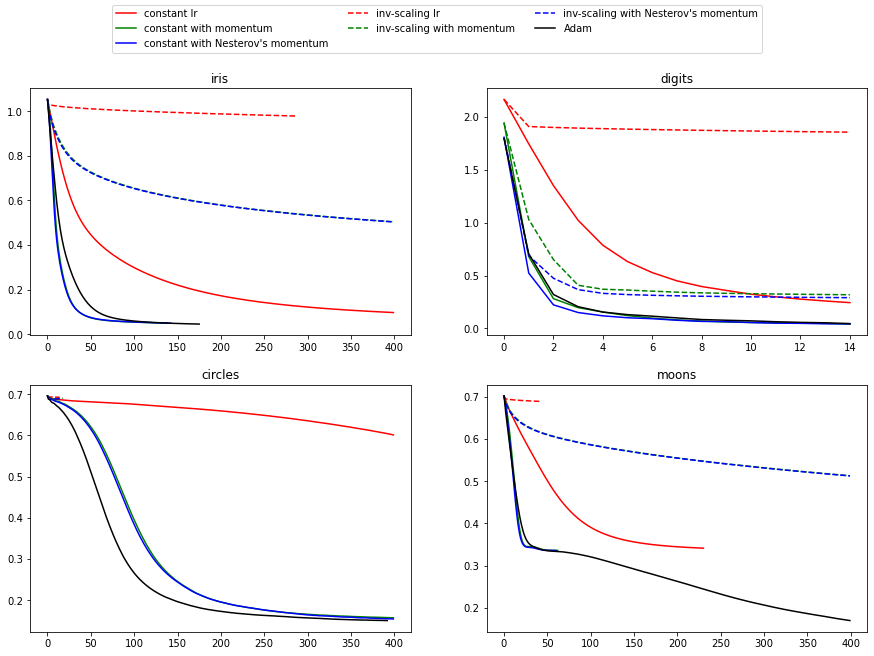

In [68]:
def plot_on_dataset(X, y, ax, name):
    # for each dataset, plot learning for each learning strategy
    print("\nlearning on dataset %s" % name)
    ax.set_title(name)
    
    X = MinMaxScaler().fit_transform(X)
    mlps = []
    if name == 'digits':
        # digits is larger but converges fairly quickly
        max_iter = 15
    else:
        max_iter = 400
        
    for label, param in zip(labels, params):
        print("training: %s" % label)
        mlp = MLPClassifier(random_state=0, max_iter=max_iter, **param)
        
        # some parameter combinations will not converge as can be seen on the
        # plots so they are ignored here
        with warnings.catch_warnings():
            warnings.filterwarnings(
                'ignore', category=ConvergenceWarning, module='sklearn'
            )
            mlp.fit(X,y)
        
        mlps.append(mlp)
        print("Training set score: %f" % mlp.score(X,y))
        print("Training set loss: %f" % mlp.loss_)
    for mlp, label, args in zip(mlps, labels, plot_args):
        ax.plot(mlp.loss_curve_, label=label, **args)
        
fig, axes = plt.subplots(2,2, figsize=(15,10))
#load / generate some toy datasets
iris = datasets.load_iris()
X_digits, y_digits = datasets.load_digits(return_X_y=True)
circles = datasets.make_circles(noise = 0.2, factor=0.5, random_state=1)
moons = datasets.make_moons(noise=0.3, random_state=0)
data_sets = [
    (iris.data, iris.target),
    (X_digits, y_digits),
    circles,
    moons,
    
]

for ax, data, name in zip(
    axes.ravel(), data_sets, ['iris', 'digits', 'circles', 'moons']
):
    #plot_on_dataset(X=data[0], y=data[1], ax=ax, name=name)
    plot_on_dataset(*data, ax=ax, name=name)

fig.legend(ax.get_lines(), labels, ncol=3, loc='upper center')
plt.show()

In [69]:
circles = datasets.make_circles(noise = 0, factor=0.5, random_state=1)
moons = datasets.make_moons(noise=0, random_state=0)


In [70]:
circles[0]

array([[-4.04508497e-01, -2.93892626e-01],
       [-2.12889646e-01, -4.52413526e-01],
       [-5.35826795e-01, -8.44327926e-01],
       [-3.64484314e-01, -3.42273553e-01],
       [ 3.18711995e-01, -3.85256621e-01],
       [-5.35826795e-01,  8.44327926e-01],
       [-1.87381315e-01, -9.82287251e-01],
       [-3.18711995e-01, -3.85256621e-01],
       [-3.64484314e-01,  3.42273553e-01],
       [-1.54508497e-01,  4.75528258e-01],
       [ 2.67913397e-01, -4.22163963e-01],
       [ 1.87381315e-01, -9.82287251e-01],
       [ 3.64484314e-01,  3.42273553e-01],
       [ 4.84291581e-01,  1.24344944e-01],
       [ 4.96057351e-01,  6.26666168e-02],
       [-6.37423990e-01, -7.70513243e-01],
       [-7.28968627e-01, -6.84547106e-01],
       [ 7.28968627e-01, -6.84547106e-01],
       [-4.64888243e-01, -1.84062276e-01],
       [ 3.09016994e-01,  9.51056516e-01],
       [ 9.68583161e-01,  2.48689887e-01],
       [-4.84291581e-01,  1.24344944e-01],
       [ 4.64888243e-01, -1.84062276e-01],
       [ 3.

In [71]:
circles[0][:,0]

array([-0.4045085 , -0.21288965, -0.53582679, -0.36448431,  0.31871199,
       -0.53582679, -0.18738131, -0.31871199, -0.36448431, -0.1545085 ,
        0.2679134 ,  0.18738131,  0.36448431,  0.48429158,  0.49605735,
       -0.63742399, -0.72896863,  0.72896863, -0.46488824,  0.30901699,
        0.96858316, -0.48429158,  0.46488824,  0.03139526, -0.72896863,
       -0.30901699,  0.36448431, -0.96858316,  0.87630668,  0.06279052,
       -0.2679134 ,  0.49605735,  0.43815334,  0.4045085 ,  0.03139526,
        0.30901699,  0.96858316,  0.21288965, -0.96858316, -0.42577929,
       -0.09369066,  0.46488824, -0.48429158, -0.30901699, -0.2679134 ,
        0.42577929,  0.80901699,  0.21288965, -0.9921147 ,  0.48429158,
        0.63742399,  0.4045085 , -0.9921147 ,  0.87630668,  0.2679134 ,
        0.9921147 , -0.87630668, -0.03139526,  0.92977649, -0.49605735,
       -0.80901699, -0.21288965, -0.4045085 ,  0.53582679,  0.92977649,
        0.09369066,  0.53582679,  0.1545085 ,  1.        ,  0.15

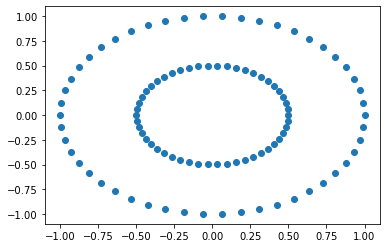

In [72]:
plt.scatter(x = circles[0][:,0], y = circles[0][:,1])

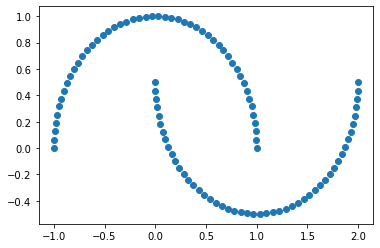

In [73]:
plt.scatter(x = moons[0][:,0], y = moons[0][:,1])

## Visualization of MLP weights on MNIST
Sometimes looking at the learned coefficients of a neural network can provide insight into the learning behavior. For example if weights look unstructured, maybe some were not used at all, or if very large coefficients exist, maybe regularization was too low or the learning rate too high.

This example shows how to plot some of the first layer weights in a MLPClassifier trained on the MNIST dataset.

The input data consists of 28x28 pixel handwritten digits, leading to 784 features in the dataset. Therefore the first layer weight matrix has the shape (784, hidden_layer_sizes[0]). We can therefore visualize a single column of the weight matrix as a 28x28 pixel image.

To make the example run faster, we use very few hidden units, and train only for a very short time. Training longer would result in weights with a much smoother spatial appearance. The example will throw a warning because it doesn’t converge, in this case this is what we want because of resource usage constraints on our Continuous Integration infrastructure that is used to build this documentation on a regular basis.

Iteration 1, loss = 0.44139186
Iteration 2, loss = 0.19174891
Iteration 3, loss = 0.13983521
Iteration 4, loss = 0.11378556
Iteration 5, loss = 0.09443967
Iteration 6, loss = 0.07846529
Iteration 7, loss = 0.06506307
Iteration 8, loss = 0.05534985


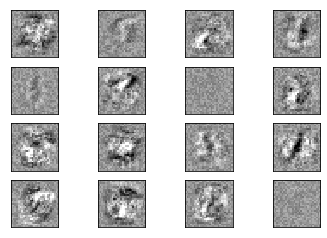

In [75]:
import warnings
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.exceptions import ConvergenceWarning
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

X, y = fetch_openml('mnist_784', return_X_y=True, as_frame=False)
X = X/255.

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.7)

mlp = MLPClassifier(
    hidden_layer_sizes=(40,),
    max_iter=8,
    alpha=1e-4,
    solver='sgd',
    verbose=10,
    random_state=1,
    learning_rate_init=0.2
)

# this example won't converge because of resource usage constraints on
# our Continuous Integration infrastructure, so we catch the warning and
# ignore it here
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning, module='sklearn')
    mlp.fit(X_train, y_train)

fig, axes = plt.subplots(4,4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax, in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28,28), cmap=plt.cm.gray, vmin=0.5*vmin, vmax=0.5*vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

In [60]:
[coef.shape for coef in mlp.coefs_]

[(784, 40), (40, 10)]

In [76]:
len(mlp.coefs_)

2

In [80]:
mlp.coefs_[0].shape, mlp.coefs_[1].shape

((784, 40), (40, 10))

## Tips on practical use

- Multi-layer Perceptron is sensitive to feature scaling, so it is highly recommended to scale your data. For example, scale each attribute on the input vector X to [0, 1] or [-1, +1], or standardize it to have mean 0 and variance 1. Note that you must apply the _same_ scaling to the test set for meaningful results. You can use `StandardScaler` for standardization.
    ```python
    from sklearn.preprocessing import StandardScaler  
    scaler = StandardScaler()  
    # Don't cheat - fit only on training data
    scaler.fit(X_train)  
    X_train = scaler.transform(X_train)  
    # apply same transformation to test data
    X_test = scaler.transform(X_test)  
    ```
    An alternative and recommended approach is to use `StandardScaler` in a `Pipeline`
- Finding a reasonable regularization parameter $α$ is best done using `GridSearchCV`, usually in the range `10.0 ** -np.arange(1, 7)`.
- Empirically, we observed that `L-BFGS` _converges faster and with better solutions on small datasets_. For relatively _large datasets_, however, _Adam_ is very robust. It usually converges quickly and gives pretty good performance. _SGD with momentum or nesterov’s momentum, on the other hand, can perform better than those two algorithms if learning rate is correctly tuned._